In [67]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  

In [68]:
sns.set(style="whitegrid")

In [69]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [32]:
X

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  
0      United-States  
1      United-States  
2      United-States  
3      United-States  
4               Cuba  
...              ...  
48837  United-States  
48838  United-States  
48839  United-States  
48840  United-States  
48841  United-States  

[48842 rows x 14 columns]

In [33]:
y['income'] = y['income'].str.replace('.', '', regex=False)

C:\Users\kjani\AppData\Local\Temp\ipykernel_13360\2974756502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.replace('.', '', regex=False)


In [34]:
y

income
0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
...      ...
48837  <=50K
48838  <=50K
48839  <=50K
48840  <=50K
48841   >50K

[48842 rows x 1 columns]

In [35]:
%matplotlib inline

(array([37155.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

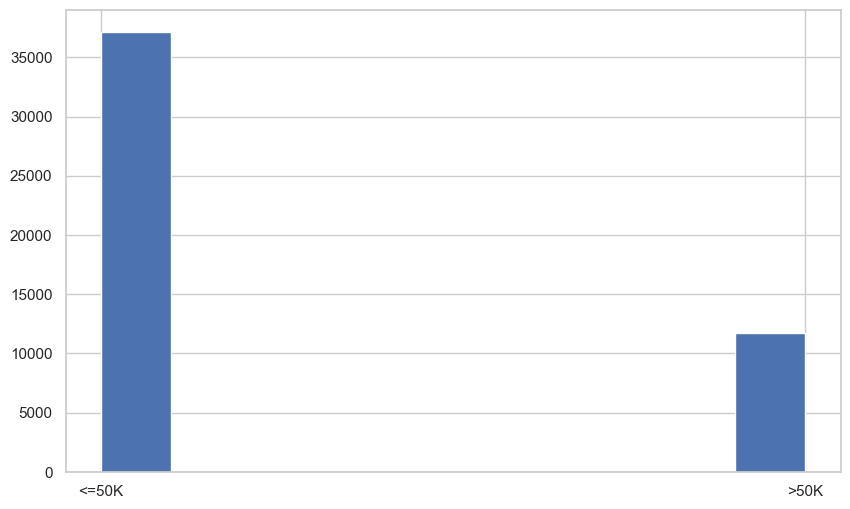

In [36]:
plt.hist(y)

In [37]:
X = pd.concat([X, y], axis=1)

In [38]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,6)})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

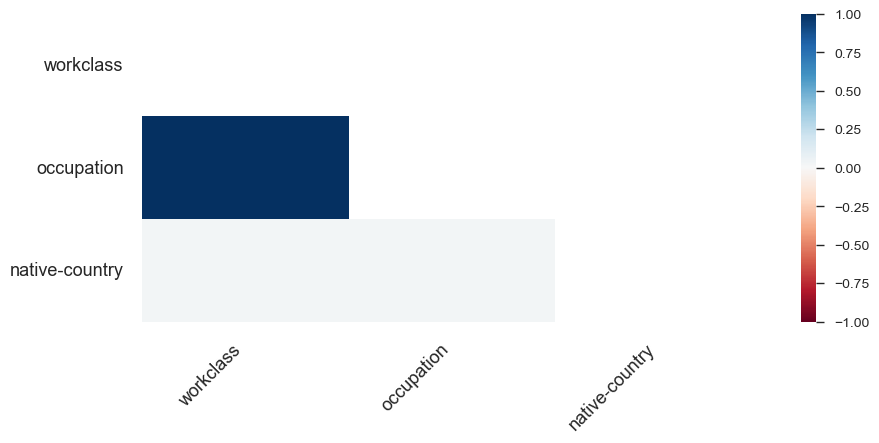

In [39]:
from ydata_profiling import ProfileReport
profile = ProfileReport(X, title="Report")
profile

In [40]:
X.isna().sum()/X.shape[0]*100

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64

In [41]:
X.shape

(48842, 15)

In [42]:
X.dropna(inplace=True)

In [43]:
X.shape

(47621, 15)

In [44]:
X.isna().sum()/X.shape[0]*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [45]:
X.reset_index(drop=True, inplace=True)

In [46]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols].describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [47]:
%matplotlib inline

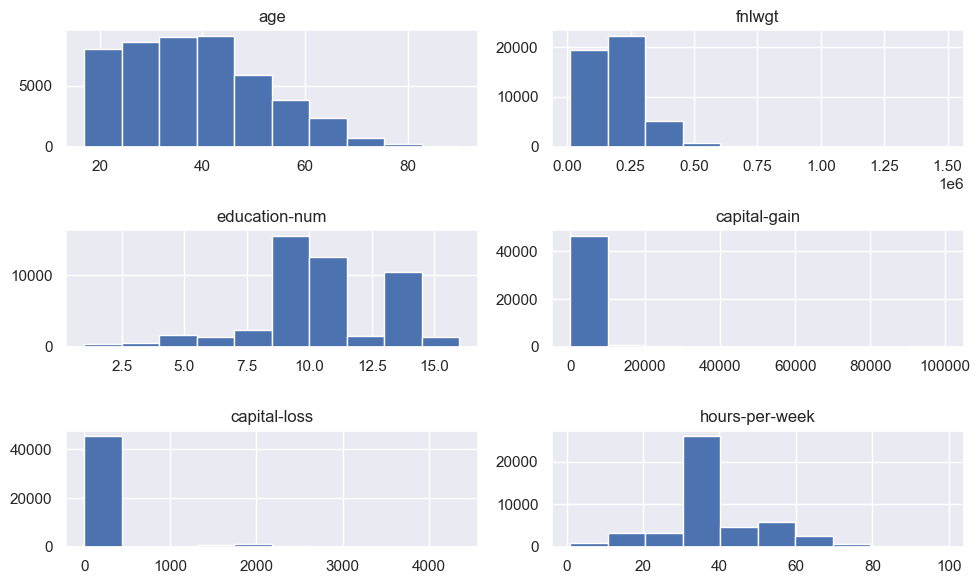

In [48]:
import matplotlib.pyplot as plt
X[numeric_cols].hist()
plt.tight_layout()

<Axes: >

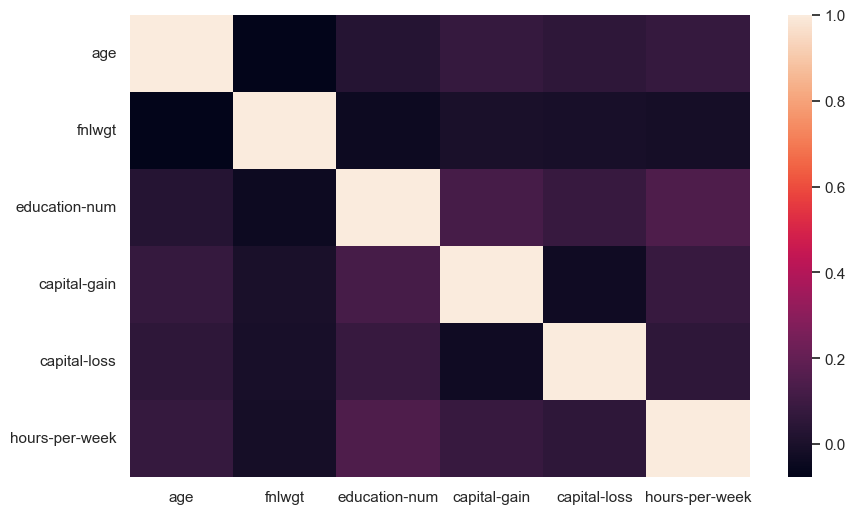

In [49]:
sns.heatmap(X[numeric_cols].corr())

In [50]:
%matplotlib inline

<Axes: >

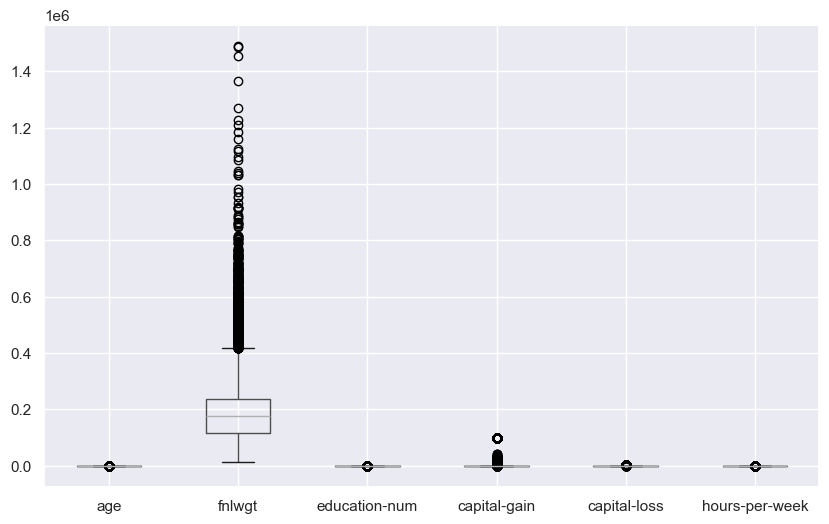

In [51]:
X.boxplot()

In [52]:
def drop_outliers(df, columns):
    df_copy = df.copy()  
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_copy[col]): 
            IQR = df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25)
            lower_boundary = df_copy[col].quantile(0.25) - 1.5*IQR
            upper_boundary = df_copy[col].quantile(0.75) + 1.5*IQR
            df_copy = df_copy.loc[(df_copy[col] >= lower_boundary) & (df_copy[col] <= upper_boundary)]
    df_copy.reset_index(drop=True, inplace=True)
    return df_copy

X_no_outliers = drop_outliers(X, X.columns)


<Axes: >

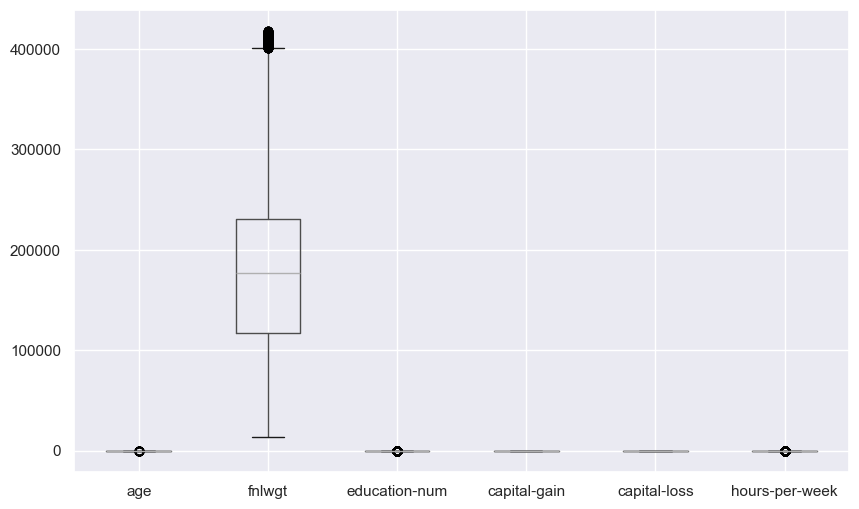

In [53]:
X_no_outliers.boxplot()

In [54]:
X_no_outliers.isna().sum()/X_no_outliers.shape[0]*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [55]:
X_no_outliers.dropna(inplace=True)

In [56]:
X_no_outliers.isna().sum()/X_no_outliers.shape[0]*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [57]:
X_no_outliers

age         workclass  fnlwgt  education  education-num  \
0       38           Private  215646    HS-grad              9   
1       53           Private  234721       11th              7   
2       28           Private  338409  Bachelors             13   
3       37           Private  284582    Masters             14   
4       52  Self-emp-not-inc  209642    HS-grad              9   
...    ...               ...     ...        ...            ...   
28869   25           Private  350977    HS-grad              9   
28870   48         Local-gov  349230    Masters             14   
28871   33           Private  245211  Bachelors             13   
28872   39           Private  215419  Bachelors             13   
28873   38           Private  374983  Bachelors             13   

           marital-status         occupation   relationship   race     sex  \
0                Divorced  Handlers-cleaners  Not-in-family  White    Male   
1      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
2      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
3      Married-civ-spouse    Exec-managerial           Wife  White  Female   
4      Married-civ-spouse    Exec-managerial        Husband  White    Male   
...                   ...                ...            ...    ...     ...   
28869       Never-married      Other-service      Own-child  White  Female   
28870            Divorced      Other-service  Not-in-family  White    Male   
28871       Never-married     Prof-specialty      Own-child  White    Male   
28872            Divorced     Prof-specialty  Not-in-family  White  Female   
28873  Married-civ-spouse     Prof-specialty        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              40  United-States  <=50K  
2                 0             0              40           Cuba  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              45  United-States   >50K  
...             ...           ...             ...            ...    ...  
28869             0             0              40  United-States  <=50K  
28870             0             0              40  United-States  <=50K  
28871             0             0              40  United-States  <=50K  
28872             0             0              36  United-States  <=50K  
28873             0             0              50  United-States  <=50K  

[28874 rows x 15 columns]

In [58]:
import pandas as pd

categorical_columns = X_no_outliers.select_dtypes(include=['object', 'category']).columns.tolist()

print("Kolumny kategoryczne:")
print(categorical_columns)

Kolumny kategoryczne:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    X_no_outliers[col] = label_encoder.fit_transform(X_no_outliers[col])

In [60]:
y = X_no_outliers['income']
X_no_outliers.drop(columns='income', inplace=True)

In [61]:
y

0        0
1        0
2        0
3        0
4        1
        ..
28869    0
28870    0
28871    0
28872    0
28873    0
Name: income, Length: 28874, dtype: int32

In [62]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Histogram-based Gradient Boosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(force_row_wise=True),
    "CatBoost": CatBoostClassifier(verbose=0)
}

from tabulate import tabulate

results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_no_outliers, y, cv=5, scoring='accuracy')
    results.append([model_name, scores.mean(), scores.std()])

print(tabulate(results, headers=["Model", "Średnia dokładność", "Odchylenie standardowe"], tablefmt="grid"))


[LightGBM] [Info] Number of positive: 4798, number of negative: 18301
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 23099, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207715 -> initscore=-1.338757
[LightGBM] [Info] Start training from score -1.338757
[LightGBM] [Info] Number of positive: 4798, number of negative: 18301
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 23099, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207715 -> initscore=-1.338757
[LightGBM] [Info] Start training from score -1.338757
[LightGBM] [Info] Number of positive: 4797, number of negative: 18302
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 23099, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207671 -> initscore=-1.339020
[LightGBM] [Info] Start training from score -1.339020
[LightGBM]

In [63]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
    }
    model = XGBClassifier(**params)
    score = cross_val_score(model, X_no_outliers, y, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Najlepsze parametry:", study.best_params)
print("Najlepsza dokładność:", study.best_value)


[I 2024-06-13 15:42:54,717] A new study created in memory with name: no-name-7c3aa4e2-6cdf-4207-b4ab-848b05b06832
[I 2024-06-13 15:42:55,409] Trial 0 finished with value: 0.8412758551920312 and parameters: {'n_estimators': 118, 'learning_rate': 0.20181579386139256, 'max_depth': 8, 'min_child_weight': 4}. Best is trial 0 with value: 0.8412758551920312.
[I 2024-06-13 15:42:56,374] Trial 1 finished with value: 0.8453972352552194 and parameters: {'n_estimators': 242, 'learning_rate': 0.02039155473423164, 'max_depth': 5, 'min_child_weight': 1}. Best is trial 1 with value: 0.8453972352552194.
[I 2024-06-13 15:42:57,729] Trial 2 finished with value: 0.8290503571016213 and parameters: {'n_estimators': 171, 'learning_rate': 0.27002649899643216, 'max_depth': 10, 'min_child_weight': 2}. Best is trial 1 with value: 0.8453972352552194.
[I 2024-06-13 15:42:58,811] Trial 3 finished with value: 0.8378125317702734 and parameters: {'n_estimators': 300, 'learning_rate': 0.2614833267760649, 'max_depth': 5

Najlepsze parametry: {'n_estimators': 142, 'learning_rate': 0.1635208028466455, 'max_depth': 3, 'min_child_weight': 1}
Najlepsza dokładność: 0.8490683328909862


In [64]:
y

0        0
1        0
2        0
3        0
4        1
        ..
28869    0
28870    0
28871    0
28872    0
28873    0
Name: income, Length: 28874, dtype: int32

[LightGBM] [Info] Number of positive: 4784, number of negative: 18315
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 23099, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207109 -> initscore=-1.342443
[LightGBM] [Info] Start training from score -1.342443
[LightGBM] [Info] Number of positive: 4784, number of negative: 18315
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 23099, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207109 -> initscore=-1.342443
[LightGBM] [Info] Start training from score -1.342443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

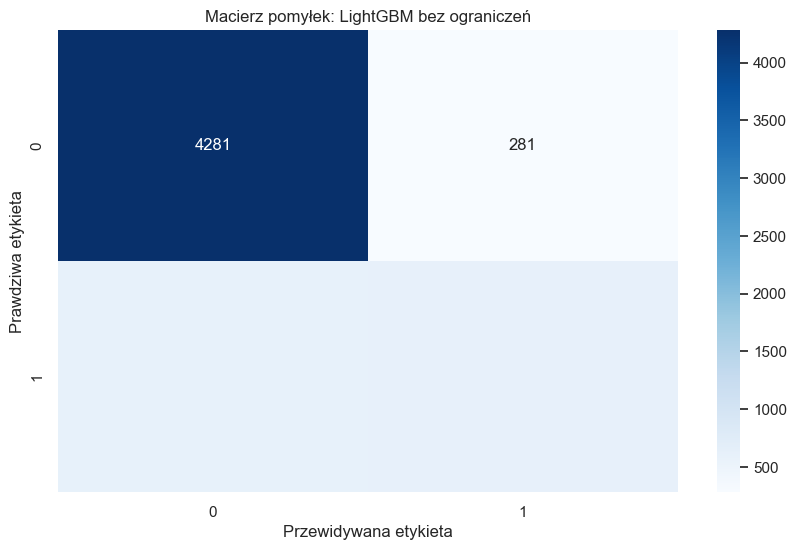

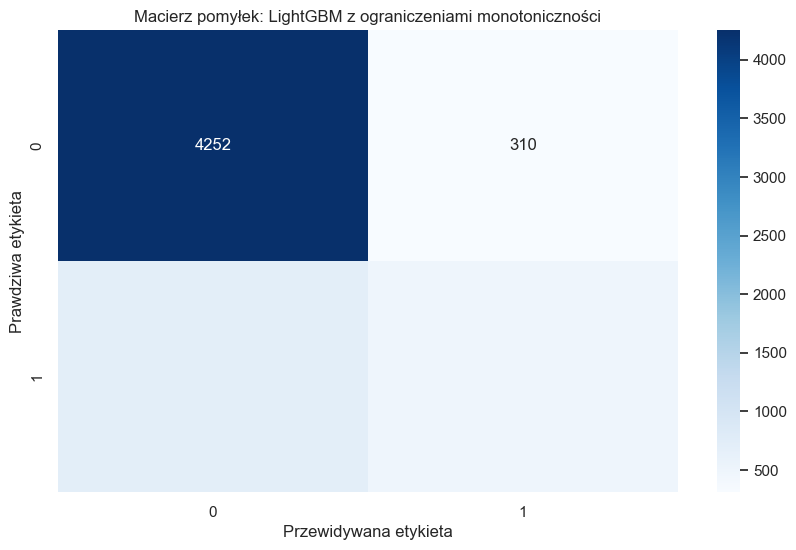

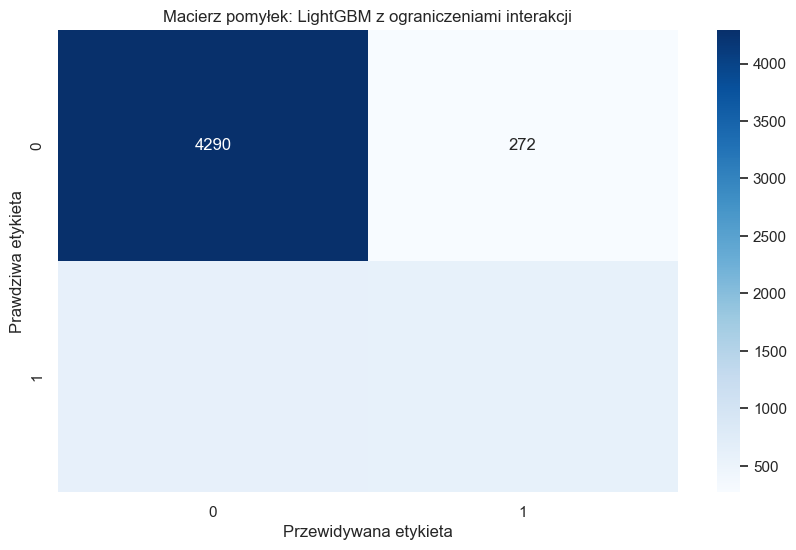

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
from tabulate import tabulate

num_features = X_no_outliers.shape[1]

monotone_constraints = [0] * num_features
monotone_constraints[4] = 1
monotone_constraints[-2] = 1

np.random.seed(42)
interaction_constraints = [[i, j] for i in range(num_features) for j in range(i+1, num_features)]
np.random.shuffle(interaction_constraints)

interaction_constraints = interaction_constraints[:5]

models = {
    "LightGBM bez ograniczeń": LGBMClassifier(force_row_wise=True),
    "LightGBM z ograniczeniami monotoniczności": LGBMClassifier(force_row_wise=True, monotone_constraints=monotone_constraints),
    "LightGBM z ograniczeniami interakcji": LGBMClassifier(force_row_wise=True, interaction_constraints=interaction_constraints)
}

results = []

conf_matrices = {}

for model_name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if len(np.unique(y)) == 2:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else: 
        y_pred_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    
    accuracy = model.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append([model_name, accuracy, auc, conf_matrix])
    conf_matrices[model_name] = conf_matrix

print(tabulate(results, headers=["Model", "Średnia dokładność", "AUC", 'Macierz pomyłek'], tablefmt="grid"))

for model_name, conf_matrix in conf_matrices.items():
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
    plt.title(f'Macierz pomyłek: {model_name}')
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Prawdziwa etykieta')
    plt.show()


binary
[LightGBM] [Info] Number of positive: 4784, number of negative: 18315
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 23099, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.207109 -> initscore=-1.342443
[LightGBM] [Info] Start training from score -1.342443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

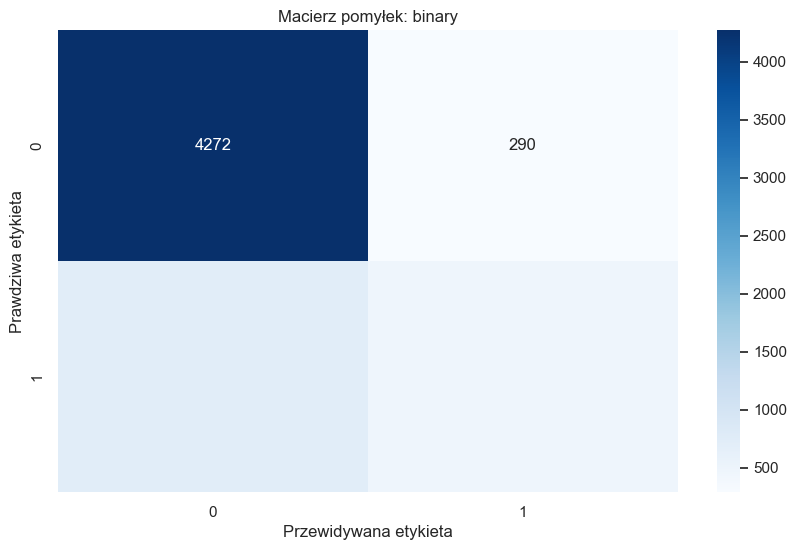

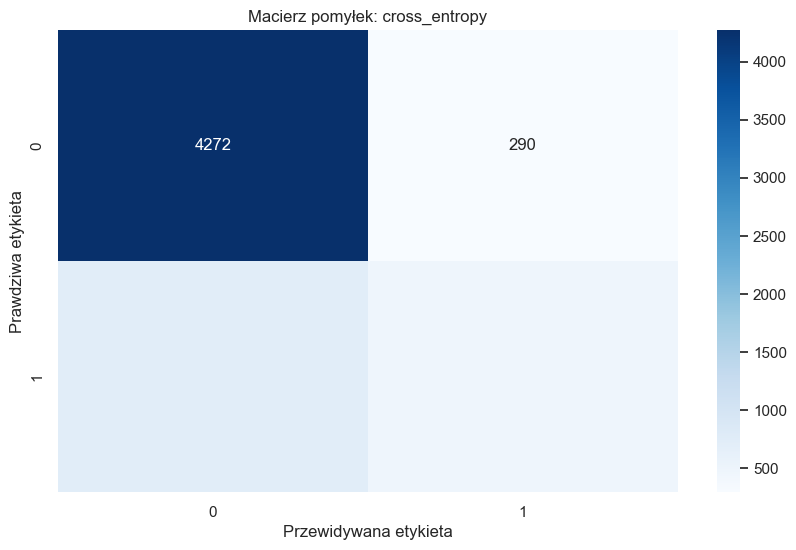

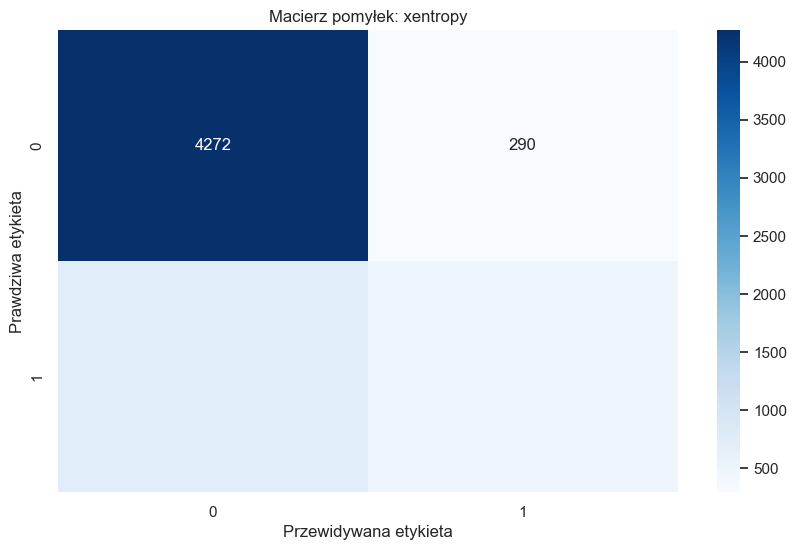

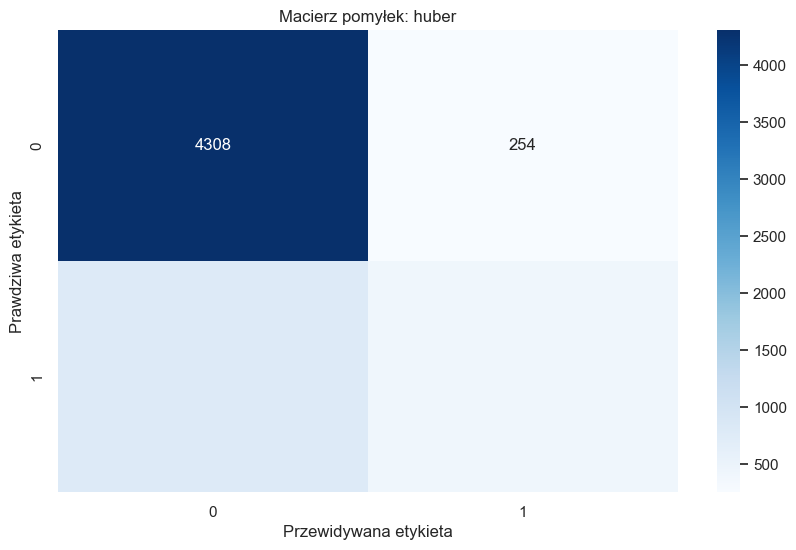

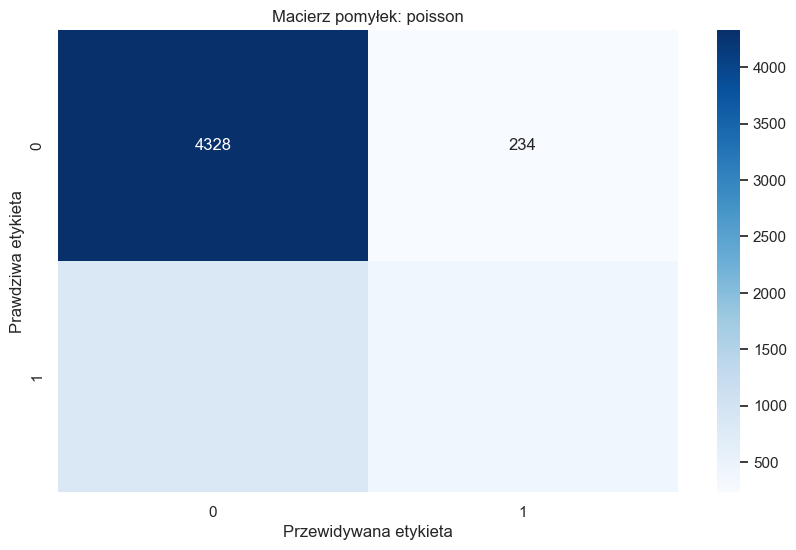

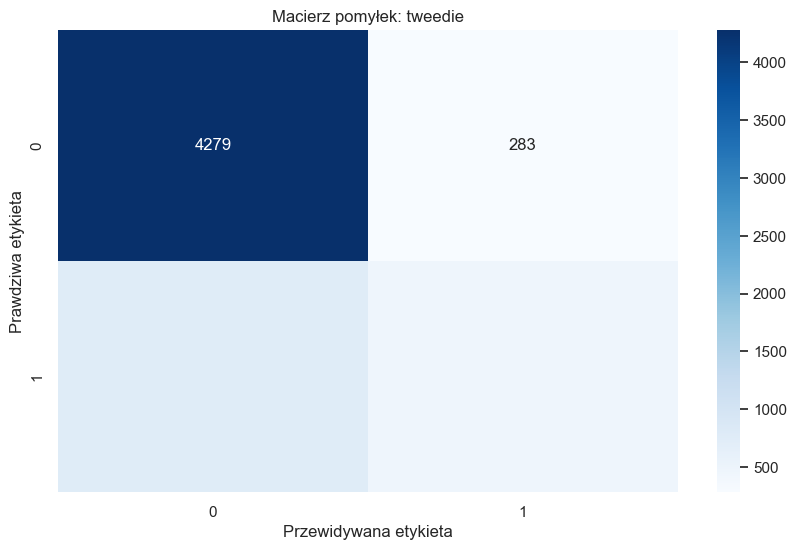

In [66]:
from lightgbm import LGBMClassifier

loss_functions = ['binary', 'cross_entropy', 'xentropy', 'huber', 'poisson', 'tweedie']

results_with_different_losses = []
conf_matrices = {}

for loss_function in loss_functions:
    print(loss_function)
    if len(np.unique(y)) > 2: 
        model = LGBMClassifier(force_row_wise=True, objective=loss_function, monotone_constraints=monotone_constraints, interaction_constraints=interaction_constraints, num_class=len(np.unique(y)))
    else:
        model = LGBMClassifier(force_row_wise=True, objective=loss_function, monotone_constraints=monotone_constraints, interaction_constraints=interaction_constraints)
    
    X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if len(np.unique(y)) == 2: 
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else: 
        y_pred_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    
    accuracy = model.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[loss_function] = conf_matrix
    
    results_with_different_losses.append([loss_function, accuracy, auc, conf_matrix])

headers = ["Funkcja Straty", "Średnia dokładność", "AUC", 'Macierz pomyłek']
print(tabulate(results_with_different_losses, headers=headers, tablefmt="grid"))

for loss_function, conf_matrix in conf_matrices.items():
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
    plt.title(f'Macierz pomyłek: {loss_function}')
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Prawdziwa etykieta')
    plt.show()